In [1]:
from IPython import get_ipython
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')
import parse_data.prepare_data as prepare_data
import globals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotting import plot_octagon, plot_trajectory
import data_extraction.get_indices as get_indices
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import plotting.plot_counts_seen_vs_chosen as plot_counts_seen_vs_chosen
import data_strings
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
drop_p_choose_high = False
drop_box_plot = False
drop_given_wall_condition = False
drop_ratio_solo_social_plot = False
drop_scatter_plot = False


### Plot the probability of choosing High across solo and social conditions
Drop points if there are too few trials after filtering the trials list and dropping initial trials

In [3]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [4]:
if not drop_p_choose_high:
    _, trial_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_all_solo, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-53-34_YansuSecondSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-23-50_JerryFirstSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-53-56_JerrySecondSolo.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through player

In [5]:
_, trial_lists_social = prepare_data.prepare_data(data_folder, json_filenames_all_social, combine=False)
trial_lists_social = trial_lists_social

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15-23-24_Franc

In [6]:
# get the probability of choosing the wall for solo and social sessions, with cut_solo_trials trials dropped from the start of the first solo session
if not drop_p_choose_high:
    (probability_choose_high_social_array,
    probability_choose_high_solo_array,
    probability_choose_high_solo_array_first_session,
    probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trial_lists_solo,
                                                                                                                                            trial_lists_social,
                                                                                                                                            wall_sep=4,
                                                                                                                                            trial_type=globals.HIGH_LOW,
                                                                                                                                            cut_solo_trials=5)  

This trial list, player 1 has no wins at High


In [7]:
probability_choose_high_social_array.shape

(18, 2)

NaN value in probabilities: [0.90909091        nan]. Dropping this point from the combined plot.


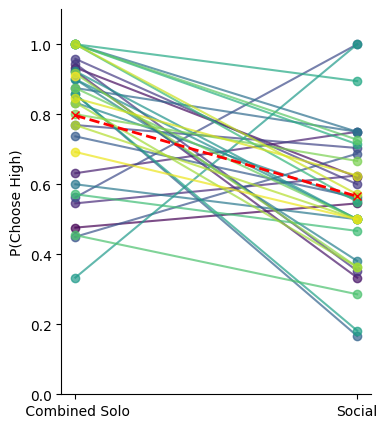

In [8]:
if not drop_p_choose_high:

    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

NaN value in probabilities: [       nan 0.54545455 0.4375    ]. Dropping this point from the separated plot.
NaN value in probabilities: [  nan 0.625 0.5  ]. Dropping this point from the separated plot.
NaN value in probabilities: [       nan 0.7037037  0.76923077]. Dropping this point from the separated plot.
NaN value in probabilities: [0.45454545 1.                nan]. Dropping this point from the separated plot.
NaN value in probabilities: [   nan 0.5625 0.75  ]. Dropping this point from the separated plot.
NaN value in probabilities: [       nan 0.75       0.83333333]. Dropping this point from the separated plot.
NaN value in probabilities: [       nan 0.5        0.83333333]. Dropping this point from the separated plot.
NaN value in probabilities: [1.         0.38095238        nan]. Dropping this point from the separated plot.
NaN value in probabilities: [  nan 0.5   0.875]. Dropping this point from the separated plot.
NaN value in probabilities: [nan 0.5 1. ]. Dropping this poin

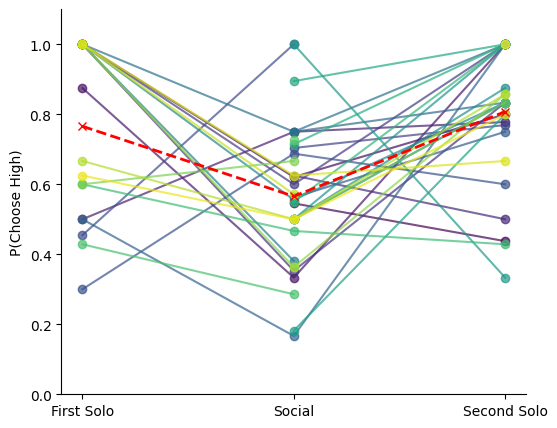

In [9]:
if not drop_p_choose_high:
    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [ ]:
if not drop_p_choose_high:
    ## Testing P(choose High) social and solo data with an independent analysis method to the one above
    probability_choose_high_social_array = plot_probability_chose_wall.get_probability_chose_high_social_all_sessions(trial_lists_social,
                                                                                                                      inferred_choice=True)
    probability_choose_high_solo_array = plot_probability_chose_wall.get_probability_chose_high_solo_all_sessions_combined(trial_lists_solo, 
                                                                                                                           cut_trials=5,
                                                                                                                           data_size_cutoff=4)

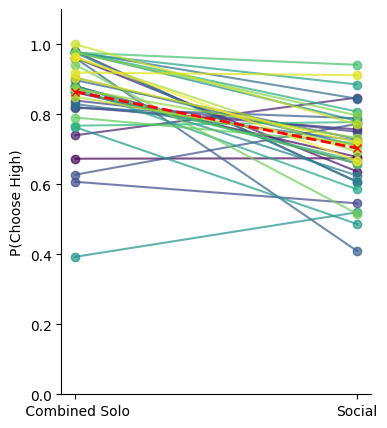

In [12]:
if not drop_p_choose_high:
    plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

In [11]:
if not drop_p_choose_high:

    trial_lists_filtered = []
    for trial_list in trial_lists_solo:

        trial_list = trial_list[5:]
        
        a = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
        trial_list = [trial_list[i] for i in a]

        b = get_indices.get_trials_with_wall_sep(trial_list, wall_sep=4)
        trial_list = [trial_list[i] for i in b]

        print(len(trial_list))
        trial_lists_filtered.append(trial_list)




    print(f"Sum: {sum(1 for trial_list in trial_lists_filtered if len(trial_list) <= 4)}")
    print(f"Total sum: {len(trial_lists_filtered)}")


4
16
9
5
8
5
8
9
3
8
11
6
7
15
0
13
11
4
10
10
3
16
6
13
1
6
5
6
4
6
5
4
5
6
1
8
4
7
0
6
2
5
4
5
3
5
3
5
5
7
7
3
4
4
1
6
5
4
5
7
2
4
6
7
6
2
7
6
8
5
2
7
Sum: 24
Total sum: 72


### Plot the probability of choosing the low wall across different conditions
Inferred losers choice seems to be slow mainly because of get_wall_visible (20-30 ms seconds for each trial for each player)

The main function called in probability_first_wall_chosen_and_low_multiple_sessions_df, first_visible_wall_chosen_session, accounts for basically all of the time in this cell

Within first_visible_wall_chosen_session, it seems to only be get_wall_visible that takes up time on each trial loop 

The main function for inferring losers choice seems to only take about 200 ms per player per session

NB: This means it is not loser's inferred choice but identifying wall visibility (first wall vis, etc.) that is taking time

In [54]:
if not drop_box_plot:
  (probability_first_wall_chosen_when_low_array,
    times_first_wall_chosen_when_low_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social(trial_lists_social[:12], wall_sep=None, inferred_choice=False, debug=False)
  (probability_first_wall_chosen_when_high_array,
    times_first_wall_chosen_when_high_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social(trial_lists_social[:12], wall_sep=None, inferred_choice=False, reverse=True, debug=False)

  wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
  wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']


trial list index: 0
player num: 0
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 6.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 8.0
 this_player_this_tria

In [55]:
if not drop_box_plot:
  (probability_first_wall_chosen_when_low_array,
    times_first_wall_chosen_when_low_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_combined_solo(trial_lists_solo, wall_sep=None, debug=False)
  (probability_first_wall_chosen_when_high_array,
    times_first_wall_chosen_when_high_array,
    probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_combined_solo(trial_lists_solo, wall_sep=None, reverse=True, debug=False)

  wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
  wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']

trial list index: 0
 player wall choice this trial: 8.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 4.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 8.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: False
 player wall choice this trial: 8.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 3.0
 this_player_this_trial_first_visible_wall_chosen: False
 player wall choice this trial: 4.0
 this_player_this_trial_first_visible_wall_chosen: False
 player wall choice this trial: 8.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 8.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 3.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 4.0
 this_player_this_tri

d:\tom\documents\swc\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired", width=.8)


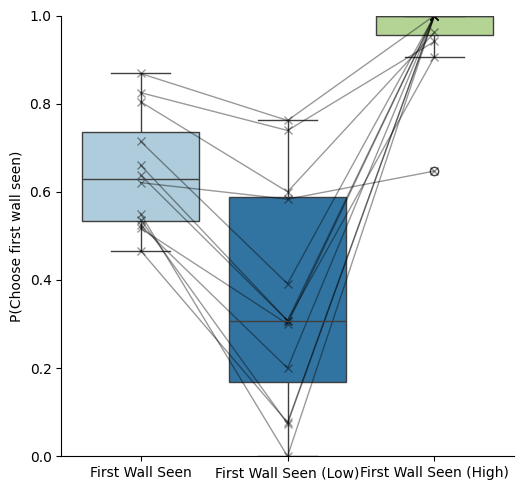

In [56]:
if not drop_box_plot:   
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels, ylabel="P(Choose first wall seen)")

Histogram of trial number counts for the current condition, across players

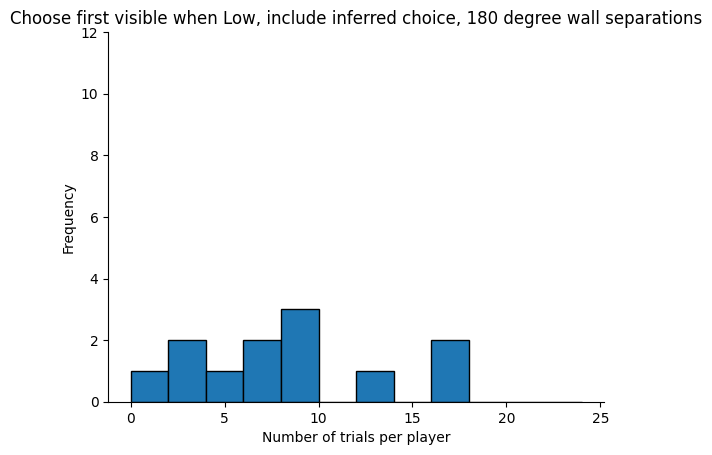

In [57]:
if not drop_box_plot:
    data = times_first_wall_chosen_when_low_array.ravel()
    plt.hist(data, bins=range(0,25,2), edgecolor='black')
    plt.ylim([0, 12])
    plt.title("Choose first visible when Low, include inferred choice, 180 degree wall separations")
    plt.xlabel("Number of trials per player")
    plt.ylabel("Frequency")

    # Remove the top and right spines
    ax = plt.gca()  # Get the current axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

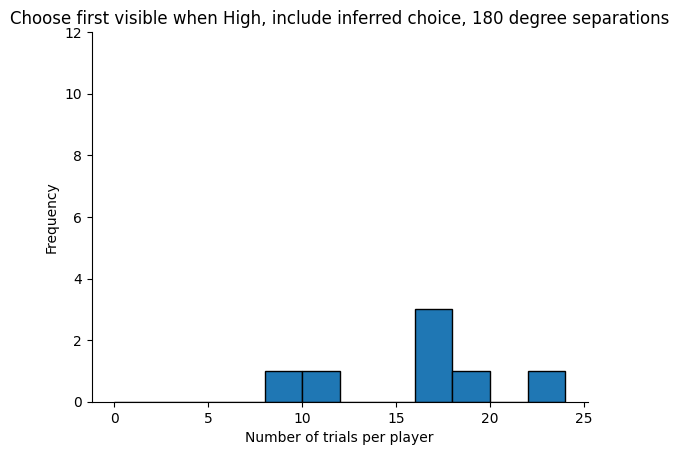

In [58]:
if not drop_box_plot:    
    data = times_first_wall_chosen_when_high_array.ravel()
    plt.hist(data, bins=range(0,25,2), edgecolor='black')
    plt.ylim([0, 12])
    plt.title("Choose first visible when High, include inferred choice, 180 degree separations")
    plt.xlabel("Number of trials per player")
    plt.ylabel("Frequency")

    # Remove the top and right spines
    ax = plt.gca()  # Get the current axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [59]:
# if not drop_box_plot:
#     data = {
#         'Condition' : times_high_wall_first_seen_and_choice_data.ravel(),
#         'Chosen' : times_high_wall_first_seen_and_chosen.ravel()
#     }

#     plot_counts_seen_vs_chosen.plot_counts_condition_vs_chosen(data, title='Times high wall seen first and chosen across individuals', define_ylim=(0,45))

NameError: name 'times_high_wall_first_seen_and_choice_data' is not defined

### Plot P(choose High) for conditions of High first visible and High second visible
- Also includes stacked bar plots of "num condition fulfilled and choice data avaiable" alongide "condition fulfilled and chose given wall"

In [60]:
%%capture
if not drop_given_wall_condition:  
  (probability_high_wall_chosen_when_first_seen,
    times_high_wall_first_seen,
    times_high_wall_first_seen_and_choice_data,
    times_high_wall_first_seen_and_chosen) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions_social(trial_lists_social[:12], given_wall_first_vis=True,
                                                                                                                                  given_wall_index=0, wall_sep=None, 
                                                                                                                                current_fov=110,
                                                                                                                                inferred_choice=False, debug=False)

In [61]:
%%capture
if not drop_given_wall_condition:  
  (probability_high_wall_chosen_when_second_seen,
    times_high_wall_second_seen,
    times_high_wall_second_seen_and_choice_data,
    times_high_wall_second_seen_and_chosen) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions_social(trial_lists_social[:12], given_wall_first_vis=False,
                                                                                                                                  given_wall_index=0, wall_sep=2, 
                                                                                                                                current_fov=110,
                                                                                                                                inferred_choice=False, debug=False)

In [62]:
if not drop_given_wall_condition: 
    wall_choice_probabilities = [probability_high_wall_chosen_when_first_seen, probability_high_wall_chosen_when_second_seen] 
    wall_choice_labels = ['High first visible', 'High second visible']

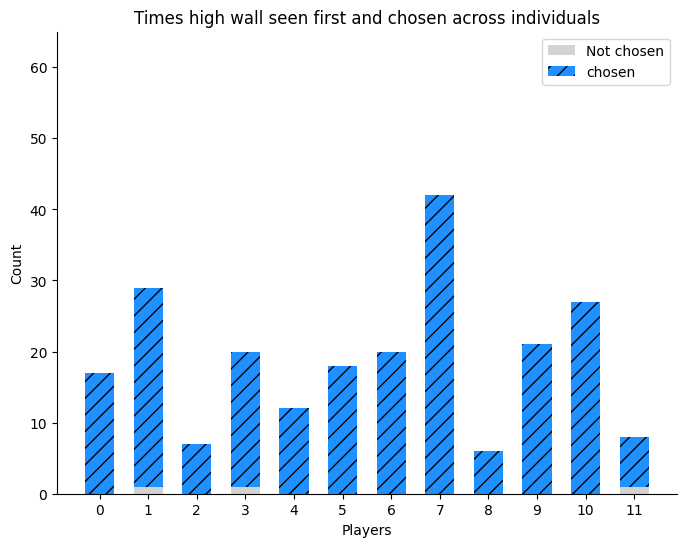

In [63]:
if not drop_given_wall_condition:
    data = {
        'Condition' : times_high_wall_first_seen_and_choice_data.ravel(),
        'Chosen' : times_high_wall_first_seen_and_chosen.ravel()
    }

    plot_counts_seen_vs_chosen.plot_counts_condition_vs_chosen(data, title='Times high wall seen first and chosen across individuals', define_ylim=(0,65))

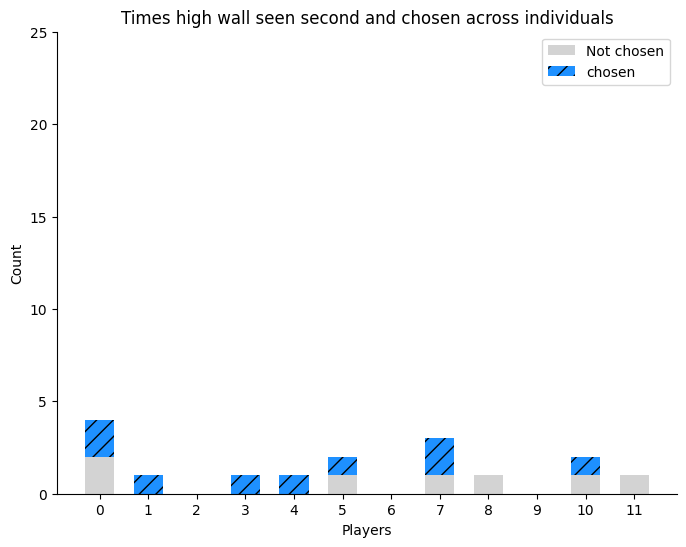

In [64]:
if not drop_given_wall_condition:
    data = {
        'Condition' : times_high_wall_second_seen_and_choice_data.ravel(),
        'Chosen' : times_high_wall_second_seen_and_chosen.ravel()
    }

    plot_counts_seen_vs_chosen.plot_counts_condition_vs_chosen(data, title='Times high wall seen second and chosen across individuals', define_ylim=(0,25))

d:\tom\documents\swc\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired", width=.8)


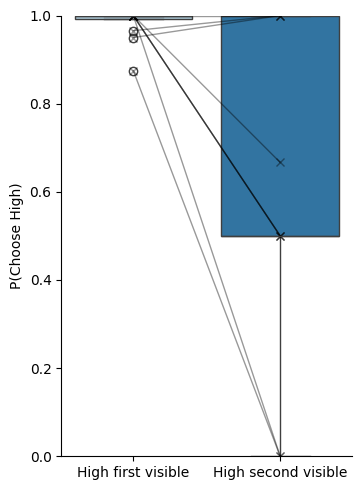

In [65]:
if not drop_given_wall_condition:   
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels, ylabel="P(Choose High)")


### Plot of ratio of P(choose High) for conditions of High first visible and High second visible, across solo (combined) and social sessions


First get the standard P(choose High) for High first vis and High second vis conditions

In [ ]:
# parameters for this plot
trial_lists_social_ratio_plot = trial_lists_social
trial_lists_solo_ratio_plot = trial_lists_solo
given_wall_first_vis = True
given_wall_index = 0
wall_sep = None
current_fov = 110
cut_trials = 5
inferred_choice = True
debug = False

In [67]:
%%capture
if not drop_ratio_solo_social_plot:  
  (probability_high_wall_chosen_when_first_seen,
    times_high_wall_first_seen,
    times_high_wall_first_seen_and_choice_data,
    times_high_wall_first_seen_and_chosen) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions_social(trial_lists_social_ratio_plot, given_wall_first_vis=True,
                                                                                                                                  given_wall_index=given_wall_index, wall_sep=wall_sep, 
                                                                                                                                current_fov=current_fov,
                                                                                                                                inferred_choice=inferred_choice, debug=debug)
if not drop_given_wall_condition:  
  (probability_high_wall_chosen_when_second_seen,
    times_high_wall_second_seen,
    times_high_wall_second_seen_and_choice_data,
    times_high_wall_second_seen_and_chosen) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions_social(trial_lists_social_ratio_plot, given_wall_first_vis=False,
                                                                                                                                  given_wall_index=given_wall_index, wall_sep=wall_sep, 
                                                                                                                                current_fov=current_fov,
                                                                                                                                inferred_choice=inferred_choice, debug=debug)
                                                                                                                                

d:\tom\documents\swc\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired", width=.8)


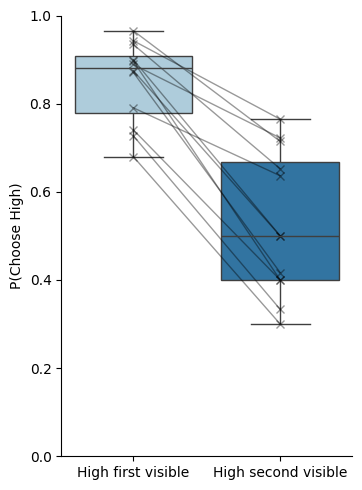

In [ ]:
if not drop_ratio_solo_social_plot:   
    wall_choice_probabilities = [probability_high_wall_chosen_when_first_seen, probability_high_wall_chosen_when_second_seen] 
    wall_choice_labels = ['High first visible', 'High second visible']
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels, ylabel="P(Choose High)")


Then repeat for solo (combined, drop 5 of first solo)

In [69]:
%%capture
if not drop_ratio_solo_social_plot:  
  (probability_high_wall_chosen_when_first_seen_solo,
    times_high_wall_first_seen_solo,
    times_high_wall_first_seen_and_choice_data_solo,
    times_high_wall_first_seen_and_chosen_solo) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions_solo(trial_lists_solo_ratio_plot, given_wall_first_vis=True,
                                                                                                                                  given_wall_index=given_wall_index, wall_sep=wall_sep, 
                                                                                                                                current_fov=current_fov, cut_trials=cut_trials,
                                                                                                                                inferred_choice=False, debug=debug)
if not drop_given_wall_condition:  
  (probability_high_wall_chosen_when_second_seen_solo,
    times_high_wall_second_seen_solo,
    times_high_wall_second_seen_and_choice_data_solo,
    times_high_wall_second_seen_and_chosen_solo) = wall_visibility_and_choice.given_wall_chosen_conditioned_on_visibility_multiple_sessions_solo(trial_lists_solo_ratio_plot, given_wall_first_vis=False,
                                                                                                                                  given_wall_index=given_wall_index, wall_sep=wall_sep, 
                                                                                                                                current_fov=current_fov, cut_trials=cut_trials,
                                                                                                                                inferred_choice=False, debug=debug)
                                                                                                                                

d:\tom\documents\swc\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired", width=.8)


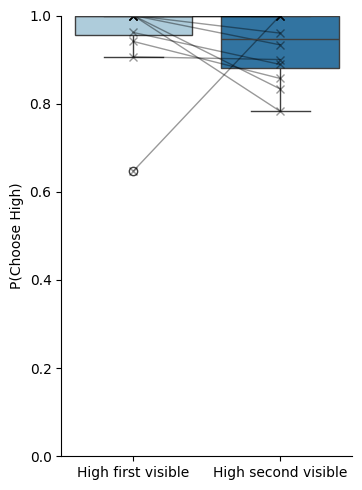

In [ ]:
if not drop_ratio_solo_social_plot:   
    wall_choice_probabilities = [probability_high_wall_chosen_when_first_seen_solo, probability_high_wall_chosen_when_second_seen_solo] 
    wall_choice_labels = ['High first visible', 'High second visible']
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels, ylabel="P(Choose High)")


Now we have the data, get the ratios between first and second seen for each condition

In [ ]:
probability_high_wall_chosen_when_first_seen_solo, probability_high_wall_chosen_when_first_seen.ravel()

(array([1.        , 1.        , 1.        , 0.96153846, 1.        ,
        1.        , 1.        , 1.        , 0.64705882, 0.94117647,
        0.90625   , 1.        ]),
 array([0.87096774, 0.79069767, 0.72727273, 0.88888889, 0.74074074,
        0.89655172, 0.875     , 0.93442623, 0.9       , 0.96551724,
        0.94285714, 0.68      ]))

In [ ]:
probability_high_wall_chosen_when_second_seen_solo, probability_high_wall_chosen_when_second_seen.ravel()

(array([0.83333333, 1.        , 0.96      , 0.88888889, 1.        ,
        1.        , 0.7826087 , 0.93333333, 1.        , 0.85714286,
        0.9       , 1.        ]),
 array([0.41666667, 0.63636364, 0.33333333, 0.72222222, 0.4       ,
        0.4       , 0.5       , 0.65217391, 0.5       , 0.71428571,
        0.76470588, 0.3       ]))

In [ ]:
times_high_wall_second_seen_and_chosen

array([[ 5.,  7.],
       [ 1., 13.],
       [ 6.,  4.],
       [ 8., 15.],
       [ 2.,  5.],
       [13.,  3.]])

In [ ]:
ratio_solo = probability_high_wall_chosen_when_first_seen_solo/probability_high_wall_chosen_when_second_seen_solo

ratio_social = probability_high_wall_chosen_when_first_seen/probability_high_wall_chosen_when_second_seen

In [ ]:
ratio_solo, ratio_social 

(array([1.2       , 1.        , 1.04166667, 1.08173077, 1.        ,
        1.        , 1.27777778, 1.07142857, 0.64705882, 1.09803922,
        1.00694444, 1.        ]),
 array([[2.09032258, 1.24252492],
        [2.18181818, 1.23076923],
        [1.85185185, 2.24137931],
        [1.75      , 1.43278689],
        [1.8       , 1.35172414],
        [1.23296703, 2.26666667]]))

d:\tom\documents\swc\repos\octagon_analysis\plotting\plot_probability_chose_wall.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Condition", y="Probability", data=df, palette="Paired", width=.8)


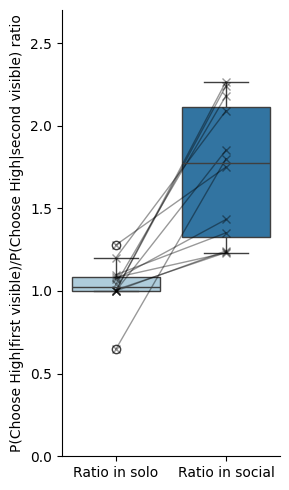

In [ ]:
if not drop_ratio_solo_social_plot:   
    wall_choice_probabilities = [ratio_solo, ratio_social] 
    wall_choice_labels = ['Ratio in solo', 'Ratio in social']
    plot_probability_chose_wall.boxplot_probability_choose_wall(wall_choice_probabilities, wall_choice_labels, ylabel="P(Choose High|first visible)/P(Choose High|second visible) ratio",
                                                                 ylim=(0,2.7), set_aspect=1.5)


### Plot performance against probability of choosing Low when Low first visibile 

In [77]:
trial_lists_social_drop_5 = [trial_list for i,trial_list in enumerate(trial_lists_social) if i != 5]

trial list index: 0
player num: 0
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 2.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 6.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 5.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 8.0
 this_player_this_tria

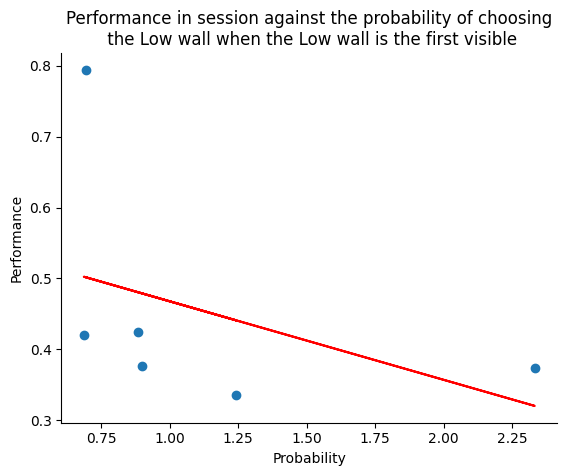

In [ ]:
if not drop_scatter_plot:
    plot_probability_chose_wall.plot_performance_against_probability_low_when_first_visible_df(trial_lists_social, inferred_choice=False, correlation_line=True, print_correlation=True)